# Utilities example

Analyze a complex of two strands intended to form a bipedal walker with a duplex torso and single-stranded legs (Shin and Pierce, J Am Chem Soc, 2004).

Material: DNA    
Temperature: 23 C

Calculate the partition function, equilibrium pair probability matrix, MFE proxy structure(s), and a set of suboptimal structures within a specified free energy gap. Calculate the complex ensemble defect with respect to the desired structure, as well as the equilibrium probability of the target structure. Design a sequence intended to adopt the desired structure and check its equilibrium pair probabilities, complex ensemble defect, and equilibrium target sturcture probability. 

Utilities commands are quick and easy for analyzing or designing a single complex ensemble. By contrast: 1) Analysis commands provide more efficient general-purpose tools for analyzing one or more test tube ensembles (or complex ensembles), using caching to reduce computational cost. 2) Design commands provide more versatile general-purpose tools for designing one or more test tube ensembles (or complex ensembles). 

In [1]:
# Import NUPACK Python module
from nupack import *

In [2]:
# Define physical model 
my_model = Model(material='dna', celsius=23)

# Define walker sequences
walker_seq = ['GGCTGGTTTCTGCTCTCTAGTTCGCGAGGTGCAATCTCCTATC', 'GTCTGGGATGCTGGATACTGAACCTAGAGAGCAGAAACCAGCC']

# Define intended walker structure 
walker_struc = '(20.23+.23)20'

In [3]:
# Partition function and complex free energy
my_pfunc, my_free_energy = pfunc(strands=walker_seq, model=my_model)

# Equilibrium pair probability matrix
my_pairs = pairs(strands=walker_seq, model=my_model)

# MFE procy structure and energy
my_mfe = mfe(strands=walker_seq, model=my_model)

# Suboptimal proxy structures and energies
my_subopt = subopt(strands=walker_seq, model=my_model, energy_gap=1.1)

In [4]:
# Print out components of the result for the given complex

print('Partition function =', my_pfunc)
print('Complex free energy =', my_free_energy)

print('\nMFE proxy structure(s):')
for i, s in enumerate(my_mfe):
    print('    %2d: %s (%.2f kcal/mol)' % (i, s.structure, s.energy))

print('\nSuboptimal proxy structure(s):')
for i, s in enumerate(my_subopt):
    print('    %2d: %s (%.2f kcal/mol)' % (i, s.structure, s.energy))

Partition function = 4.168803923E+30
Complex free energy = -41.49232746555886

MFE proxy structure(s):
     0: ((((((((((((((((((((((.((.....)))).........+..........(.(....).)...)))))))))))))))))))) (-38.55 kcal/mol)

Suboptimal proxy structure(s):
     0: ((((((((((((((((((((((.((.....)))).........+..........(.(....).)...)))))))))))))))))))) (-38.55 kcal/mol)
     1: ((((((((((((((((((((......(((.(....).)))...+..........(.(....).)...)))))))))))))))))))) (-39.26 kcal/mol)
     2: ((((((((((((((((((((...((.....))...........+..........(.(....).)...)))))))))))))))))))) (-39.09 kcal/mol)
     3: ((((((((((((((((((((((.((.....))))..(((....+.....)))(.(.(....).).).)))))))))))))))))))) (-38.45 kcal/mol)
     4: ((((((((((((((((((((......(((........)))...+..........(.(....).)...)))))))))))))))))))) (-38.81 kcal/mol)
     5: ((((((((((((((((((((((....(((.(....).)))...+..........(.(....).)))).))))))))))))))))))) (-37.98 kcal/mol)
     6: ((((((((((((((((((((((....(((.(....).)))...+..........(.(..

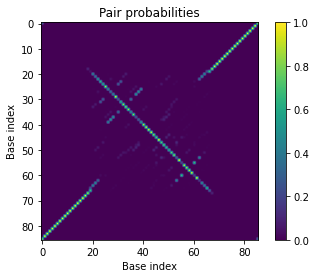

In [5]:
# Plot equilibrium pair probability matrix
import matplotlib.pyplot as plt
plt.imshow(my_pairs.to_array())
plt.xlabel('Base index')
plt.ylabel('Base index')
plt.title('Pair probabilities')
plt.colorbar()
plt.clim(0, 1)

In [6]:
# Calculate the complex ensemble defect with respect to the intended walker structure
my_defect = defect(strands=walker_seq, structure=walker_struc, model=my_model) 
print('Normalized complex ensemble defect = %.2f' % my_defect)

Normalized complex ensemble defect = 0.19


In [7]:
# Calculate the equilibrium probability of the intended walker structure
my_prob = structure_probability(strands=walker_seq, structure=walker_struc, model=my_model)
print('Equilibrium structure probability = %.1e' % my_prob)

Equilibrium structure probability = 7.4e-06


In [8]:
# Design a sequence intended to adopt the intended walker structure
new_seq = des(structure=walker_struc, model=my_model)
new_seq

['CGCAUCUAUGAAAUUAAACCAACAUCCACCAACUACACCCCAC',
 'ACCCUUUACAUCUUCUCUCUCACGGUUUAAUUUCAUAGAUGCG']

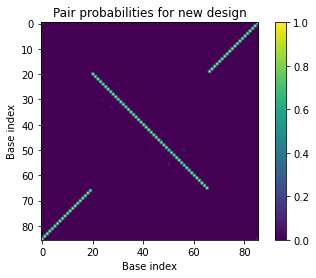

In [9]:
# Equilibrium pair probability matrix
my_pairs2 = pairs(strands=new_seq, model=my_model)

# Plot equilibrium pair probability matrix
plt.imshow(my_pairs2.to_array())
plt.xlabel('Base index')
plt.ylabel('Base index')
plt.title('Pair probabilities for new design')
plt.colorbar()
plt.clim(0, 1)

In [10]:
# Calculate the complex ensemble defect with respect to the intended walker structure for the new design
my_defect2 = defect(strands=new_seq, structure=walker_struc, model=my_model) 
print('Normalized complex ensemble defect = %.2f' % my_defect2)

Normalized complex ensemble defect = 0.01


In [11]:
# Calculate the equilibrium probability of the intended walker structure for the new design
my_prob2 = structure_probability(strands=new_seq, structure=walker_struc, model=my_model)
print('Equilibrium structure probability = %.1e' % my_prob2)

Equilibrium structure probability = 5.2e-01
